Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8373 - loss: 0.6382 - val_accuracy: 0.9015 - val_loss: 0.3610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9049 - loss: 0.3416 - val_accuracy: 0.9174 - val_loss: 0.2965
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9170 - loss: 0.2943 - val_accuracy: 0.9249 - val_loss: 0.2684
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9252 - loss: 0.2651 - val_accuracy: 0.9316 - val_loss: 0.2451
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9321 - loss: 0.2429 - val_accuracy: 0.9342 - val_loss: 0.2277
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9369 - loss: 0.2241 - val_accuracy: 0.9401 - val_loss: 0.2099
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9416 - loss: 0.2089 - val_accuracy: 0.9441 - val_loss: 0.1975
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9453 - loss: 0.1956 - 

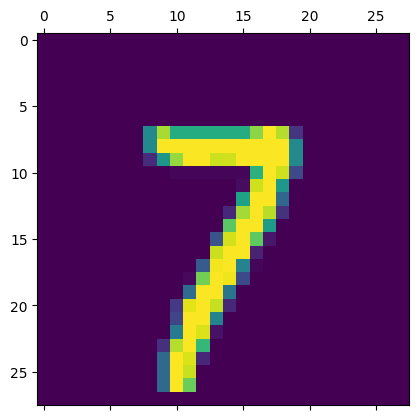

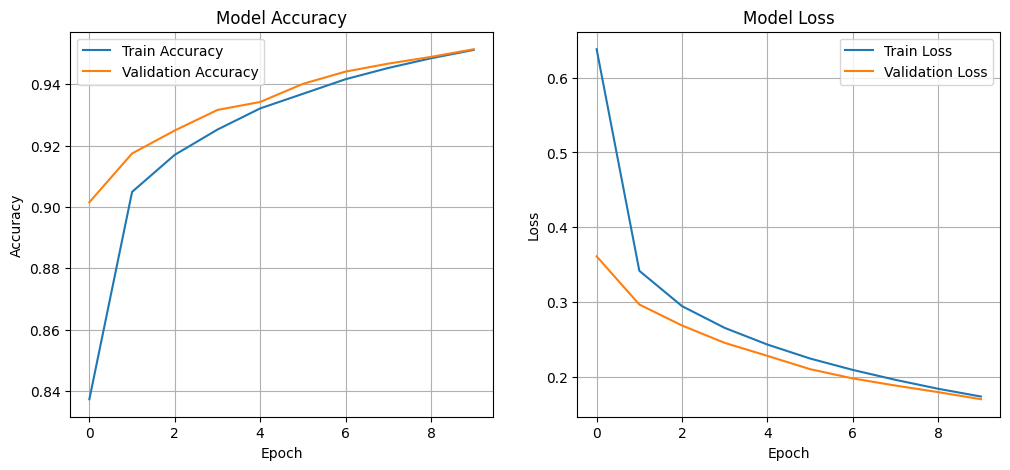

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Confusion matrix of the test set: tf.Tensor(
[[ 962    0    1    1    0    4    7    1    3    1]
 [   0 1117    3    2    0    1    3    2    7    0]
 [   8    2  978    9    8    1    8    6   10    2]
 [   1    1   11  961    0   11    1   10   10    4]
 [   1    1    4    1  938    0   10    3    4   20]
 [   7    2    1   17    3  831   11    3   12    5]
 [   9    3    5    0    5    9  922    1    4    0]
 [   2    9   20    7    5    0    0  967    1   17]
 [   3    3    4   18    7   13   11    9  902    4]
 [   9    8    1   13   24    4    1   10    3  936]], shape=(10, 10), dtype=int32)


In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display an example
plt.matshow(x_train[0])

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train[0]

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: %.3f" % test_loss)
print("Accuracy: %.3f" % test_acc)

# Predict and display a random test image
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions
test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict, axis=1)

# Confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, test_predict_labels)
print("Confusion matrix of the test set:", confusion_matrix)
